### Simple Linear Regression with Gradient Descent
To implement gradient descent for Linear Regression with one feature, we need 3 functions:
1. `compute_cost`: implements the squared error cost function
2. `compute_gradient`: implements partial derivatives for model parameters w & b
3. `gradient_descent`: utilizes the above two functions for automatically optimizing w & b

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [3]:
# initialize parameters
w_init = 0
b_init = 0

In [4]:
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

In [5]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
	
    # number of training examples
    m = x.shape[0] 
    
	# calculate cost of each example in a loop
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
		
	# calculate average cost for training set
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    iter = []
    dJ_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            iter.append(i)
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
            dJ_history.append([dj_dw, dj_db])
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, iter, J_history, p_history, dJ_history #return w and J,w history for graphing

In [8]:
# Run Gradient Descent
w_final, b_final, iter, J_hist, p_hist, dJ_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print()
print(f"(w,b) found by gradient descent: ({w_final:8.2f},{b_final:8.2f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


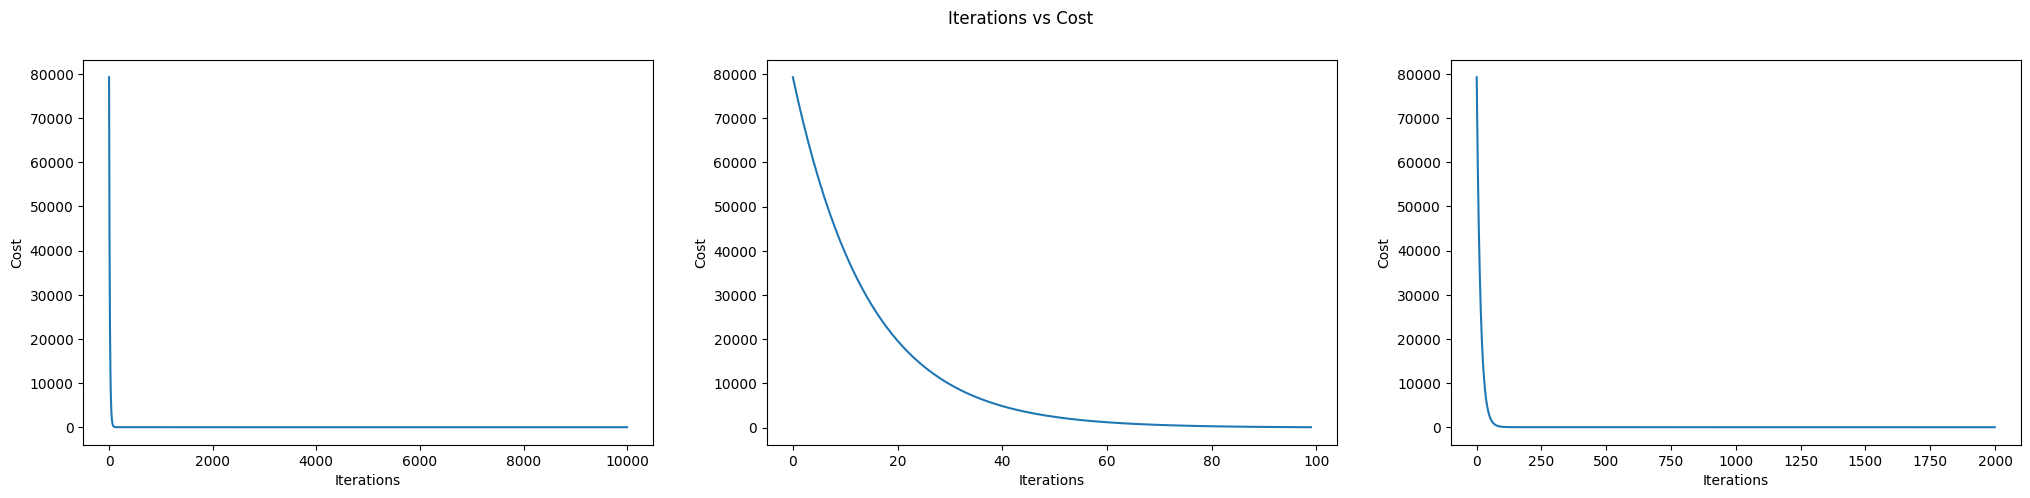

In [9]:
# Plot 1 - Cost
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs[0].plot(iter, J_hist); axs[0].set_xlabel('Iterations'); axs[0].set_ylabel('Cost')
axs[1].plot(iter[0:100], J_hist[0:100]); axs[1].set_xlabel('Iterations'); axs[1].set_ylabel('Cost')
axs[2].plot(iter[0:2000], J_hist[0:2000]); axs[2].set_xlabel('Iterations'); axs[2].set_ylabel('Cost')
fig.suptitle('Iterations vs Cost')
plt.show()

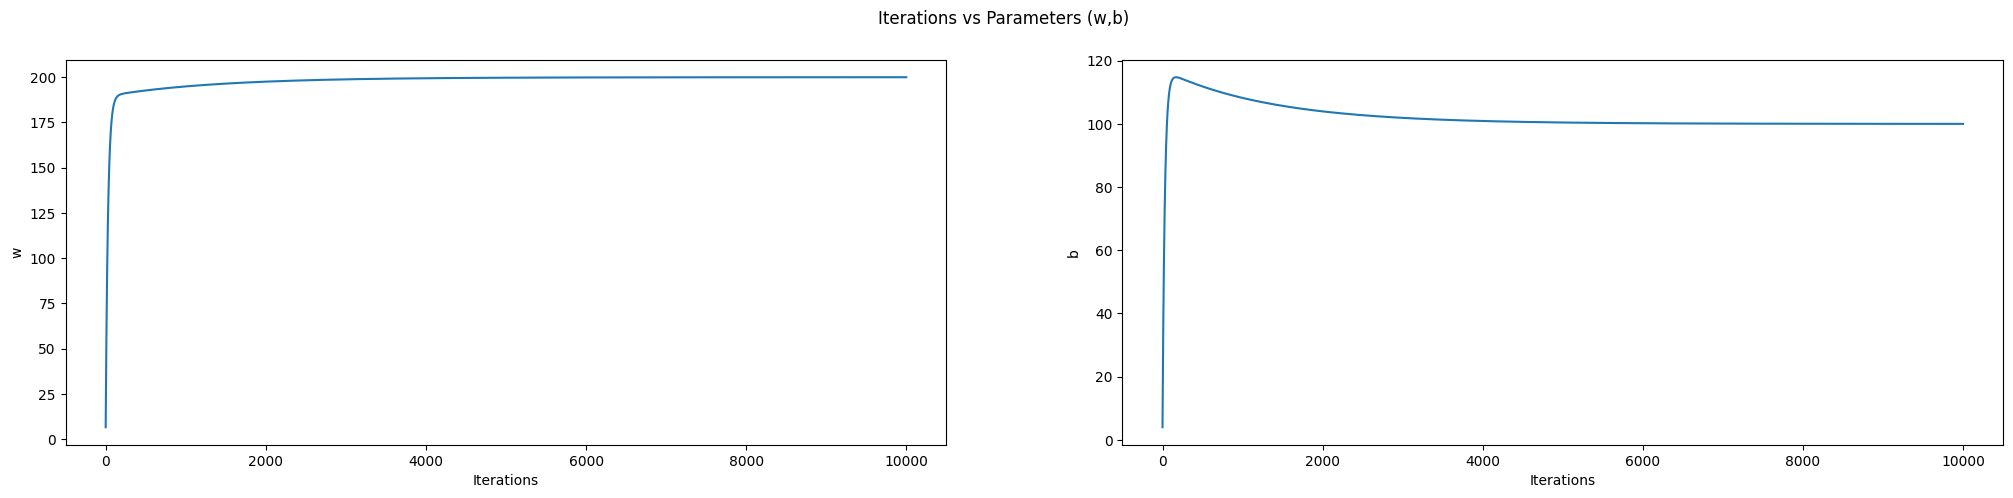

In [10]:
# Plot 2 - Model Parameters
w_hist = [item[0] for item in p_hist]
b_hist = [item[1] for item in p_hist]

fig, axs = plt.subplots(1, 2, figsize=(25, 5))
axs[0].plot(iter, w_hist); axs[0].set_xlabel('Iterations'); axs[0].set_ylabel('w')
axs[1].plot(iter, b_hist); axs[1].set_xlabel('Iterations'); axs[1].set_ylabel('b')
fig.suptitle('Iterations vs Parameters (w,b)')
plt.show()

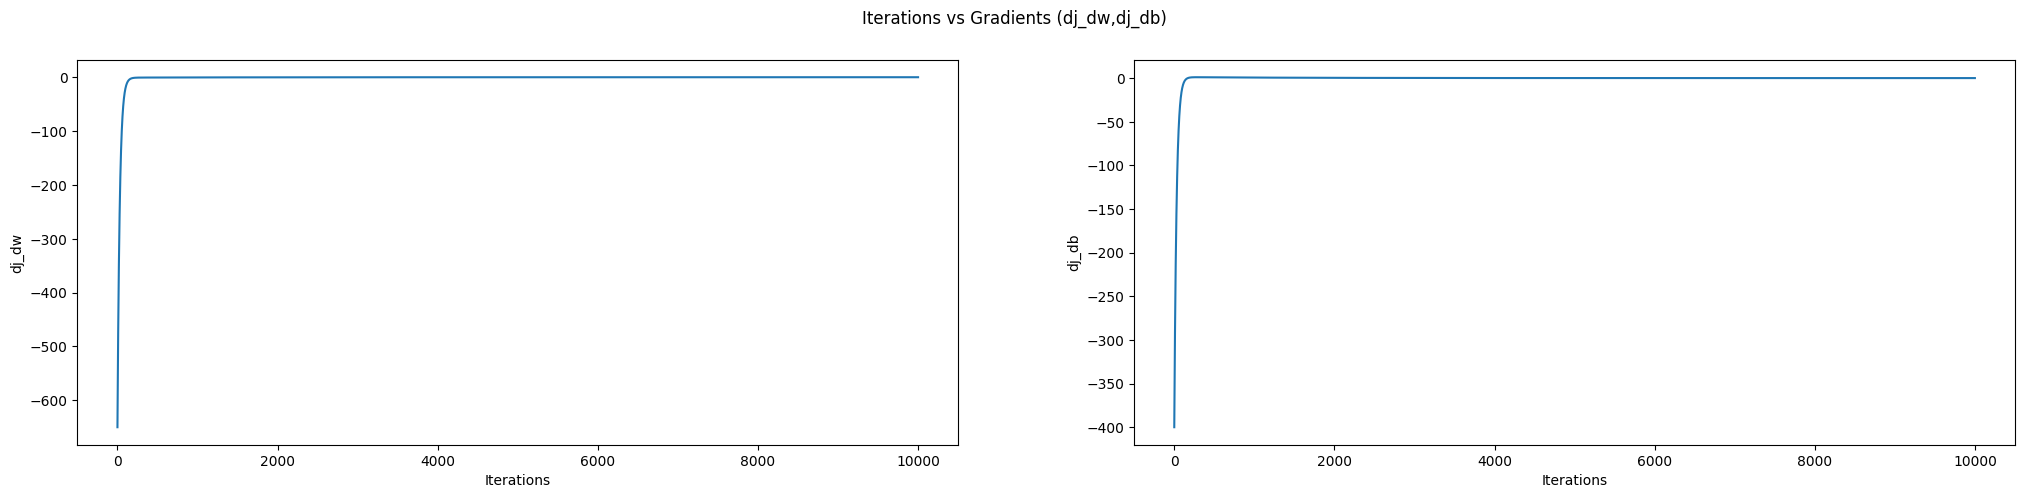

In [11]:
# Plot 3 - Parameter Derivatives
dj_dw_hist = [item[0] for item in dJ_hist]
db_db_hist = [item[1] for item in dJ_hist]

fig, axs = plt.subplots(1, 2, figsize=(25, 5))
axs[0].plot(iter, dj_dw_hist); axs[0].set_xlabel('Iterations'); axs[0].set_ylabel('dj_dw')
axs[1].plot(iter, db_db_hist); axs[1].set_xlabel('Iterations'); axs[1].set_ylabel('dj_db')
fig.suptitle('Iterations vs Gradients (dj_dw,dj_db)')
plt.show()

In [12]:
# Prediction
x_new = 1.5
y_hat = w_final*x_new + b_final
y_hat

400.00084385433854

Note:
1. The cost starts large and rapdily declines
2. The partial derivatives also get smaller, rapidly at first and then slowly
3. Cost should always decrease in successful runs. Thus, it is useful to plot the intial descent on a different scale than the final descent